<a href="https://colab.research.google.com/github/alwinkscaria/Python-Visualizations-W24/blob/main/WQA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alwin Kannyakonil Scaria
C0894287
DSMM W24

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!unzip wine+quality.zip

In [45]:
# Import necessary libraries

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For data visualization


In [78]:
# Reading the red wine and white wine datasets from a CSV file and storing it in a DataFrames

df_red_wine = pd.read_csv("winequality-red.csv",sep=';')
df_white_wine = pd.read_csv("winequality-white.csv",sep=';')

In [79]:
# Add a 'type' column to each DataFrame to differentiate between red and white wine

df_red_wine['type'] = 'red'
df_white_wine['type'] = 'white'

# Concatenate the two DataFrames

df = pd.concat([df_red_wine, df_white_wine], ignore_index=True)


# **EDA**

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [48]:
# - There are 6497 entries in the dataset.
# - There are 13 columns in total.

# Columns and their data types:

# - 'fixed acidity': Represents the fixed acidity of the wine (numerical, float64).
# - 'volatile acidity': Represents the volatile acidity of the wine (numerical, float64).
# - 'citric acid': Represents the citric acid content of the wine (numerical, float64).
# - 'residual sugar': Represents the residual sugar content of the wine (numerical, float64).
# - 'chlorides': Represents the chlorides content of the wine (numerical, float64).
# - 'free sulfur dioxide': Represents the free sulfur dioxide content of the wine (numerical, float64).
# - 'total sulfur dioxide': Represents the total sulfur dioxide content of the wine (numerical, float64).
# - 'density': Represents the density of the wine (numerical, float64).
# - 'pH': Represents the pH value of the wine (numerical, float64).
# - 'sulphates': Represents the sulphates content of the wine (numerical, float64).
# - 'alcohol': Represents the alcohol content of the wine (numerical, float64).
# - 'quality': Represents the quality rating of the wine (numerical, int64).
# - 'type': Represents the type of alcohol that is red wine or white wine for each entry (categorical, object).

# Memory usage:
# - The memory usage of the DataFrame is approximately 660.0 KB.d

# Insights:
# - There are no missing values in the dataset, as indicated by the non-null count for all columns.
# - The dataset consists of various physicochemical properties of wine along with a quality rating.


In [81]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [50]:
# Summary from the above statistics

# Fixed Acidity:
# - The average fixed acidity is approximately 8.31.
# - Majority of wines in the dataset have a moderate level of fixed acidity.

# Volatile Acidity:
# - The mean volatile acidity is around 0.53.
# - Wines with volatile acidity levels around this mean are considered normal.
# - Higher volatile acidity levels may indicate a wine fault.

# Citric Acid:
# - The mean citric acid content is approximately 0.27.
# - Citric acid can contribute to the freshness and flavor of the wine.
# - Wines with higher citric acid content might have a more acidic taste.

# Residual Sugar:
# - The average residual sugar content is 2.53 grams per liter.
# - Wines with higher residual sugar may taste sweeter, while those with lower levels may be drier.

# Chlorides:
# - The mean chloride content is around 0.0869 grams per liter.
# - Excessive chloride levels can make wine taste salty or briny.

# Free Sulfur Dioxide and Total Sulfur Dioxide:
# - These represent the amount of sulfur dioxide present in the wine.
# - The average values indicate the typical levels of sulfur dioxide in the dataset.

# Density:
# - The average density is approximately 0.9967.
# - Density is related to the sugar and alcohol content of the wine.
# - Higher density may indicate a sweeter or more alcoholic wine.

# pH:
# - The average pH level is around 3.31.
# - pH affects the taste and stability of wine.
# - Wines with lower pH levels are more acidic.

# Sulphates:
# - The mean sulphate content is approximately 0.66.
# - Sulphates can act as antioxidants and antimicrobial agents in wine.

# Alcohol:
# - The average alcohol content is 10.44%.
# - Alcohol content affects the body and mouthfeel of the wine.
# - Wines with higher alcohol content may feel fuller-bodied.

# Quality:
# - The average quality rating is approximately 5.66.
# - This indicates the overall perceived quality of the wines in the dataset.
# - Higher quality ratings suggest better-performing wines.

#Type:
# Whether the wine is red or white


In [82]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of Duplicates:", duplicates)

# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

# Verify the number of remaining rows after removing duplicates
print("Number of rows after removing duplicates:", len(df))





Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Number of Duplicates: 1177
Number of rows after removing duplicates: 5320


In [ ]:
# Post Data Cleaning

# 1. Missing Values:
#    - There are no missing values in any of the columns of the dataset.
#    - This indicates that the dataset is complete and there is no need to impute or remove missing values.
#
# 2. Number of Duplicates:
#    - There are 1177 duplicate rows in the dataset.
#    - After removing these duplicates, the number of rows in the dataset reduces to 5320.

# Insights:

# - The absence of missing values suggests that the dataset is well-prepared and suitable for analysis
#   without the need for data imputation.
# - The presence of duplicate rows may indicate some redundancy in the data collection process or errors
#   during data entry.
# - Removing duplicate rows ensures that each observation in the dataset is unique, which is important
#   for accurate analysis and modeling.
# - It's essential to identify and handle duplicates appropriately to avoid biases or inaccuracies in
#   the analysis results.

# Overall, the dataset appears to be more suitable for further analysis and modeling.


In [92]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'type' variable
df['type'] = label_encoder.fit_transform(df['type'])


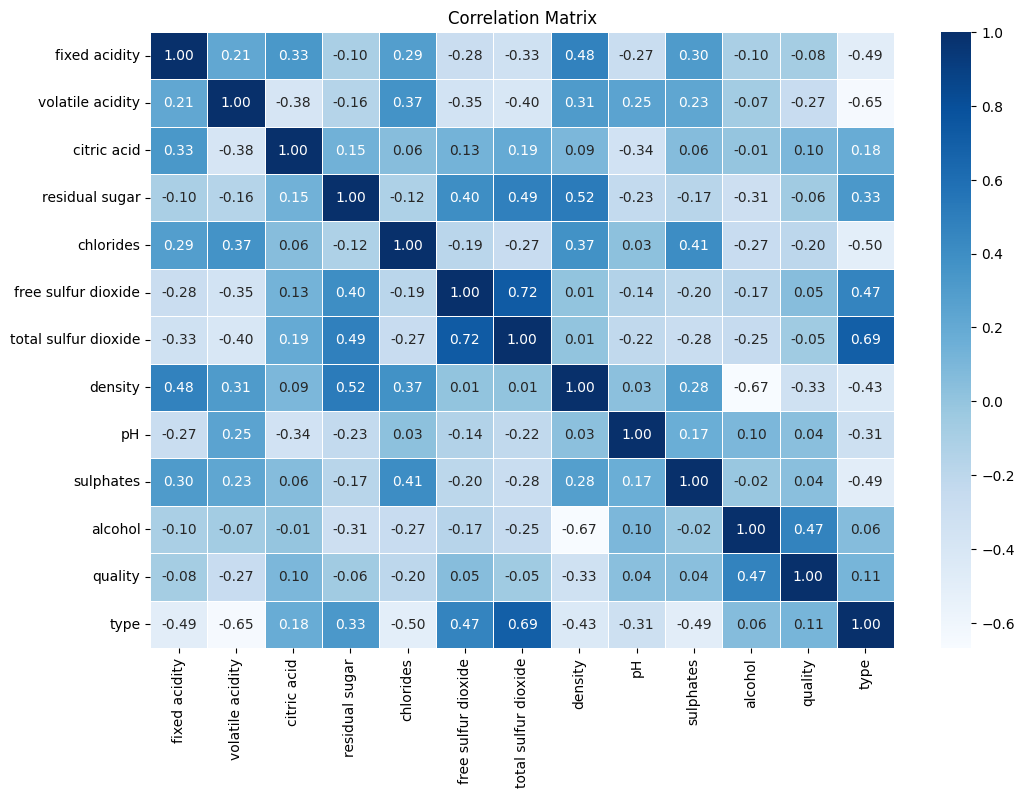

In [99]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# **Feature Engineering**

In [103]:
# Calculate total acidity: sum of fixed acidity, volatile acidity, and citric acid
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']

# Calculate alcohol content ratio: ratio of alcohol content to total acidity
df['alcohol_content_ratio'] = df['alcohol'] / df['total_acidity']

# Calculate sulfur dioxide ratio: ratio of total sulfur dioxide to free sulfur dioxide
df['sulfur_dioxide_ratio'] = df['total sulfur dioxide'] / df['free sulfur dioxide']

# Calculate pH difference: difference between pH and median pH value
median_ph = df['pH'].median()
df['pH_difference'] = df['pH'] - median_ph

# Calculate density difference: difference between density and median density value
median_density = df['density'].median()
df['density_difference'] = df['density'] - median_density

# Calculate residual sugar ratio: ratio of residual sugar to alcohol content
df['residual_sugar_ratio'] = df['residual sugar'] / df['alcohol']

# Display the first few rows of the DataFrame with engineered features
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,total_acidity,alcohol_content_ratio,sulfur_dioxide_ratio,pH_difference,density_difference,residual_sugar_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,8.10,1.160494,3.090909,0.30,0.00315,0.202128
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,8.68,1.129032,2.680000,-0.01,0.00215,0.265306
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,8.60,1.139535,3.600000,0.05,0.00235,0.234694
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,12.04,0.813953,3.529412,-0.05,0.00335,0.193878
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,8.06,1.166253,3.076923,0.30,0.00315,0.191489
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0,8.56,1.098131,3.933333,0.09,0.00175,0.170213
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0,7.95,1.257862,1.400000,0.18,-0.00005,0.120000
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0,8.40,1.130952,2.000000,0.15,0.00215,0.210526
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0,8.36,1.255981,6.000000,0.14,0.00315,0.580952
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,0,7.36,1.250000,4.333333,0.07,0.00125,0.195652


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fixed acidity          5320 non-null   float64
 1   volatile acidity       5320 non-null   float64
 2   citric acid            5320 non-null   float64
 3   residual sugar         5320 non-null   float64
 4   chlorides              5320 non-null   float64
 5   free sulfur dioxide    5320 non-null   float64
 6   total sulfur dioxide   5320 non-null   float64
 7   density                5320 non-null   float64
 8   pH                     5320 non-null   float64
 9   sulphates              5320 non-null   float64
 10  alcohol                5320 non-null   float64
 11  quality                5320 non-null   int64  
 12  type                   5320 non-null   int64  
 13  total_acidity          5320 non-null   float64
 14  alcohol_content_ratio  5320 non-null   float64
 15  sulfur_di

In [ ]:
# DataFrame information summary

# - The DataFrame contains 5320 entries (rows) and 19 columns (features).
# - Features include various chemical properties of wine samples such as fixed acidity, volatile acidity, citric acid,
#   residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol content, quality,
#   and type (red or white).

# - All features have 5320 non-null values, indicating no missing values in the dataset.
# - The data types of the features include float64 (for numerical variables) and int64 (for categorical variables).
# - Additional engineered features have been added to the DataFrame, including total_acidity, alcohol_content_ratio,
#   sulfur_dioxide_ratio, pH_difference, density_difference, and residual_sugar_ratio.
# - The memory usage of the DataFrame is approximately 960.3 KB.


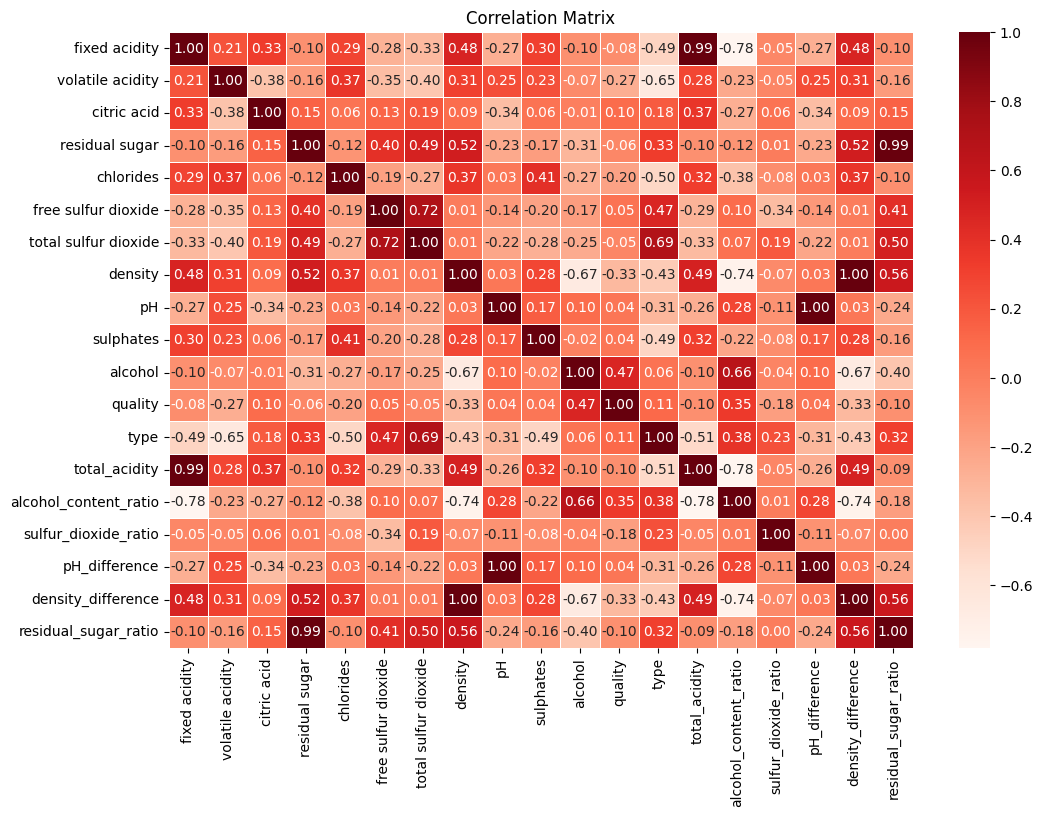

In [124]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **Visualizations**

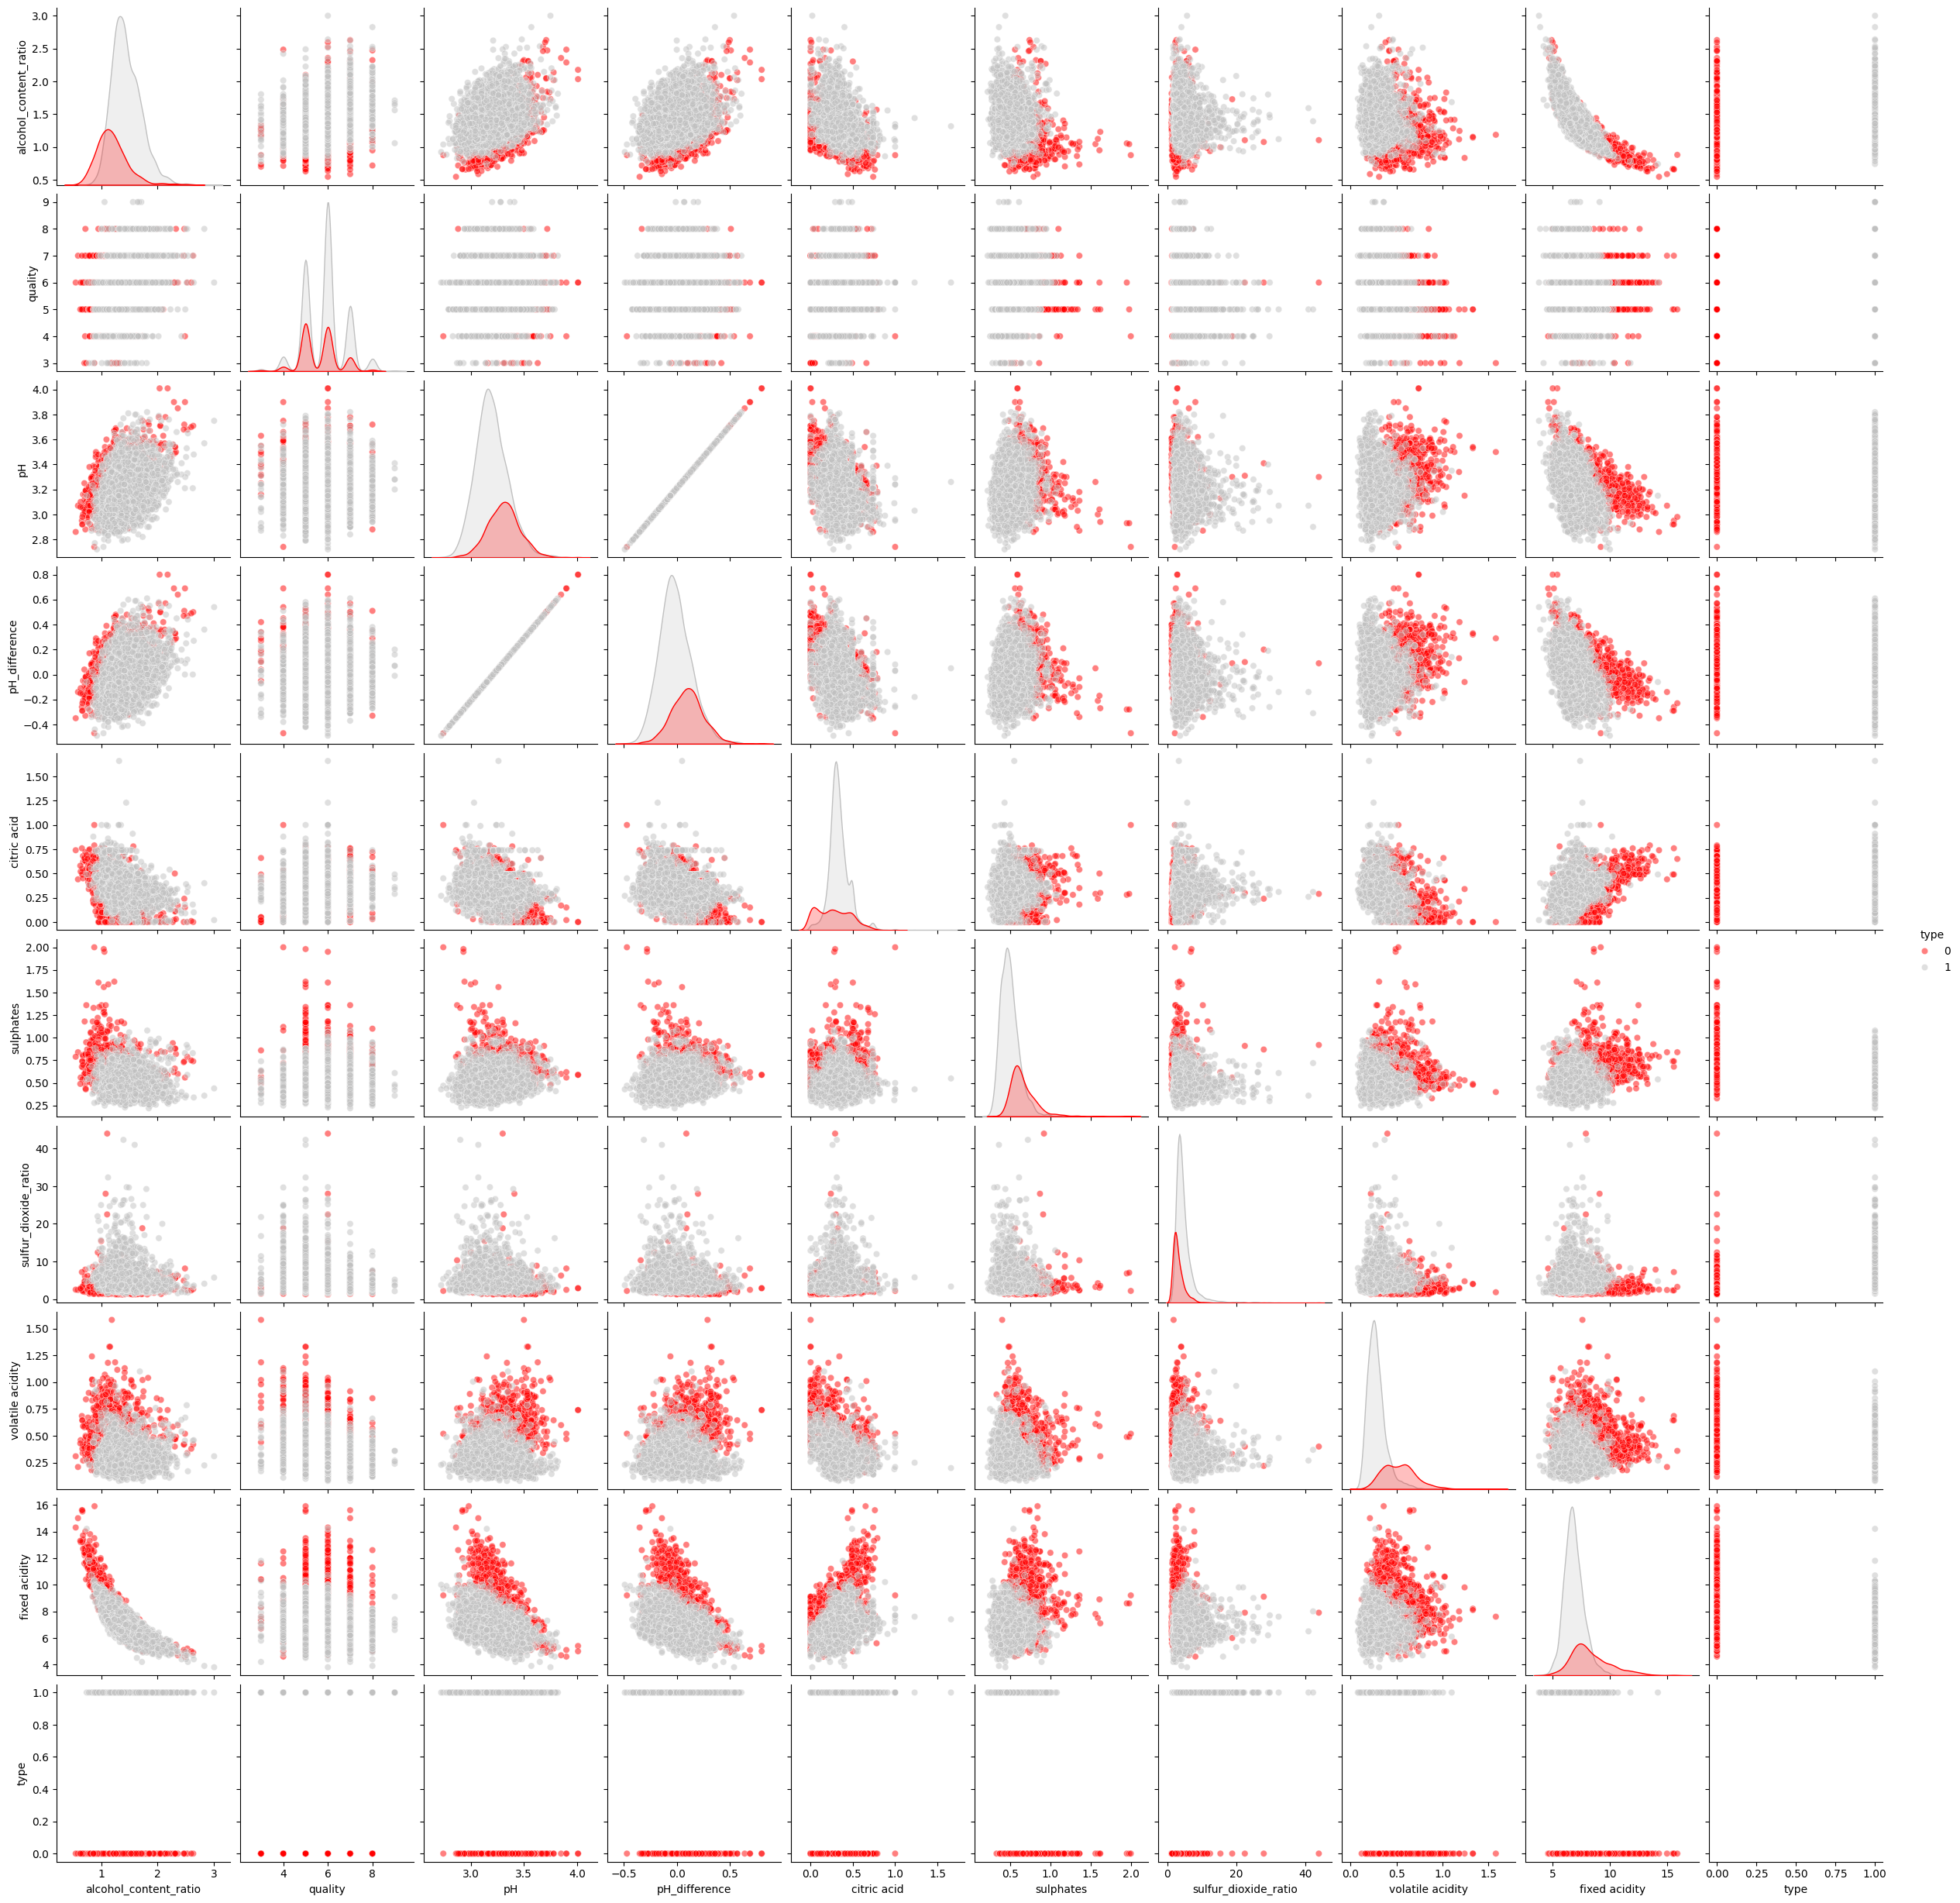

In [185]:
# Define features of interest
features = ['alcohol_content_ratio', 'quality', 'pH', 'pH_difference', 'citric acid',
            'sulphates', 'sulfur_dioxide_ratio', 'volatile acidity', 'fixed acidity', 'type']

# Create pairplot with hue based on wine type
sns.pairplot(df, vars=features, hue='type', diag_kind='kde', plot_kws={'alpha': 0.5}, palette={0: 'red', 1: 'silver'})
plt.show()


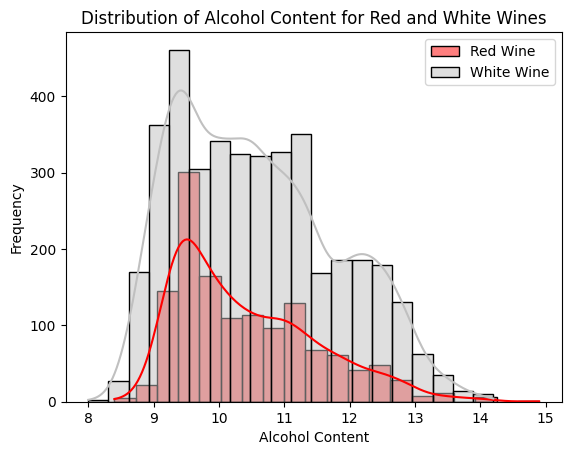

In [184]:
# Histogram for red wines
sns.histplot(data=df[df['type'] == 0], x='alcohol', bins=20, kde=True, color='red', label='Red Wine')

# Histogram for white wines
sns.histplot(data=df[df['type'] == 1], x='alcohol', bins=20, kde=True, color='silver', label='White Wine')

plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol Content for Red and White Wines')
plt.legend()
plt.show()

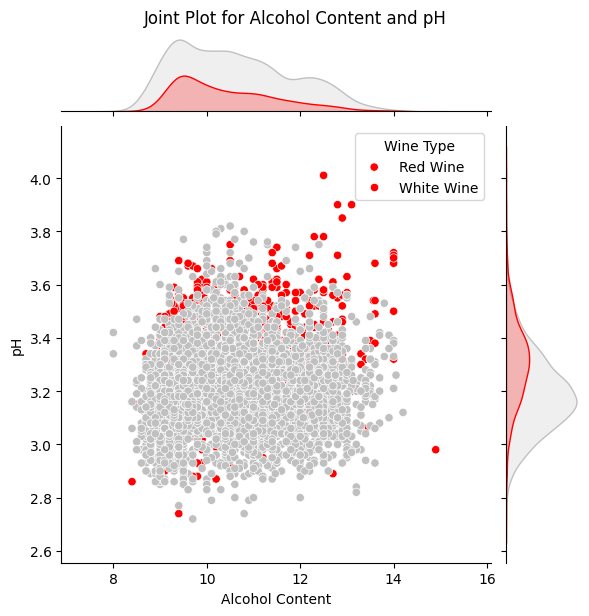

In [218]:
# Joint plot for alcohol content and pH
sns.jointplot(data=df, x='alcohol', markers='s', y='pH', kind='scatter', hue='type', palette={0: 'red', 1: 'silver'})
plt.xlabel('Alcohol Content')
plt.ylabel('pH')
plt.suptitle('Joint Plot for Alcohol Content and pH', y=1.02)
plt.legend(title='Wine Type', labels=['Red Wine','White Wine'])
plt.show()


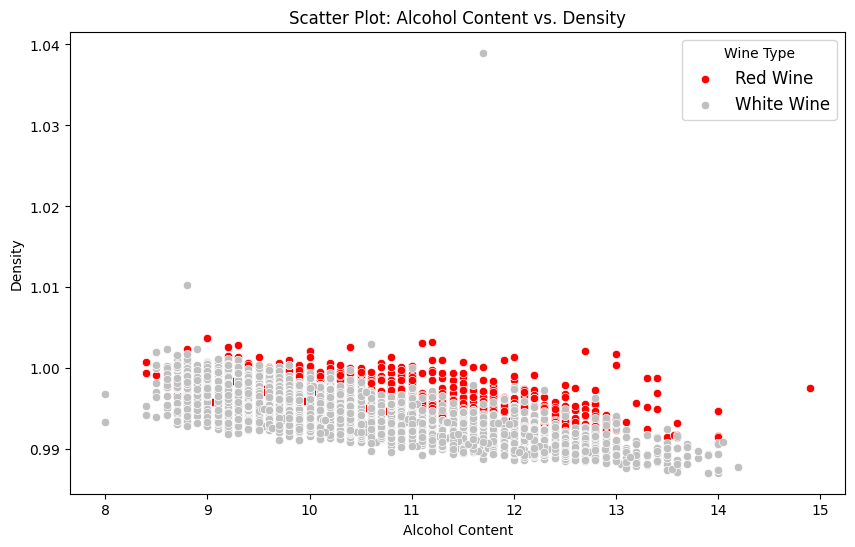

In [245]:
# Scatter plot for alcohol content and density

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['type'] == 0], x='alcohol', y='density', color='red', label='Red Wine')
sns.scatterplot(data=df[df['type'] == 1], x='alcohol', y='density', color='silver', label='White Wine')
plt.xlabel('Alcohol Content')
plt.ylabel('Density')
plt.title('Scatter Plot: Alcohol Content vs. Density')
plt.legend(title='Wine Type', fontsize='large')
plt.show()


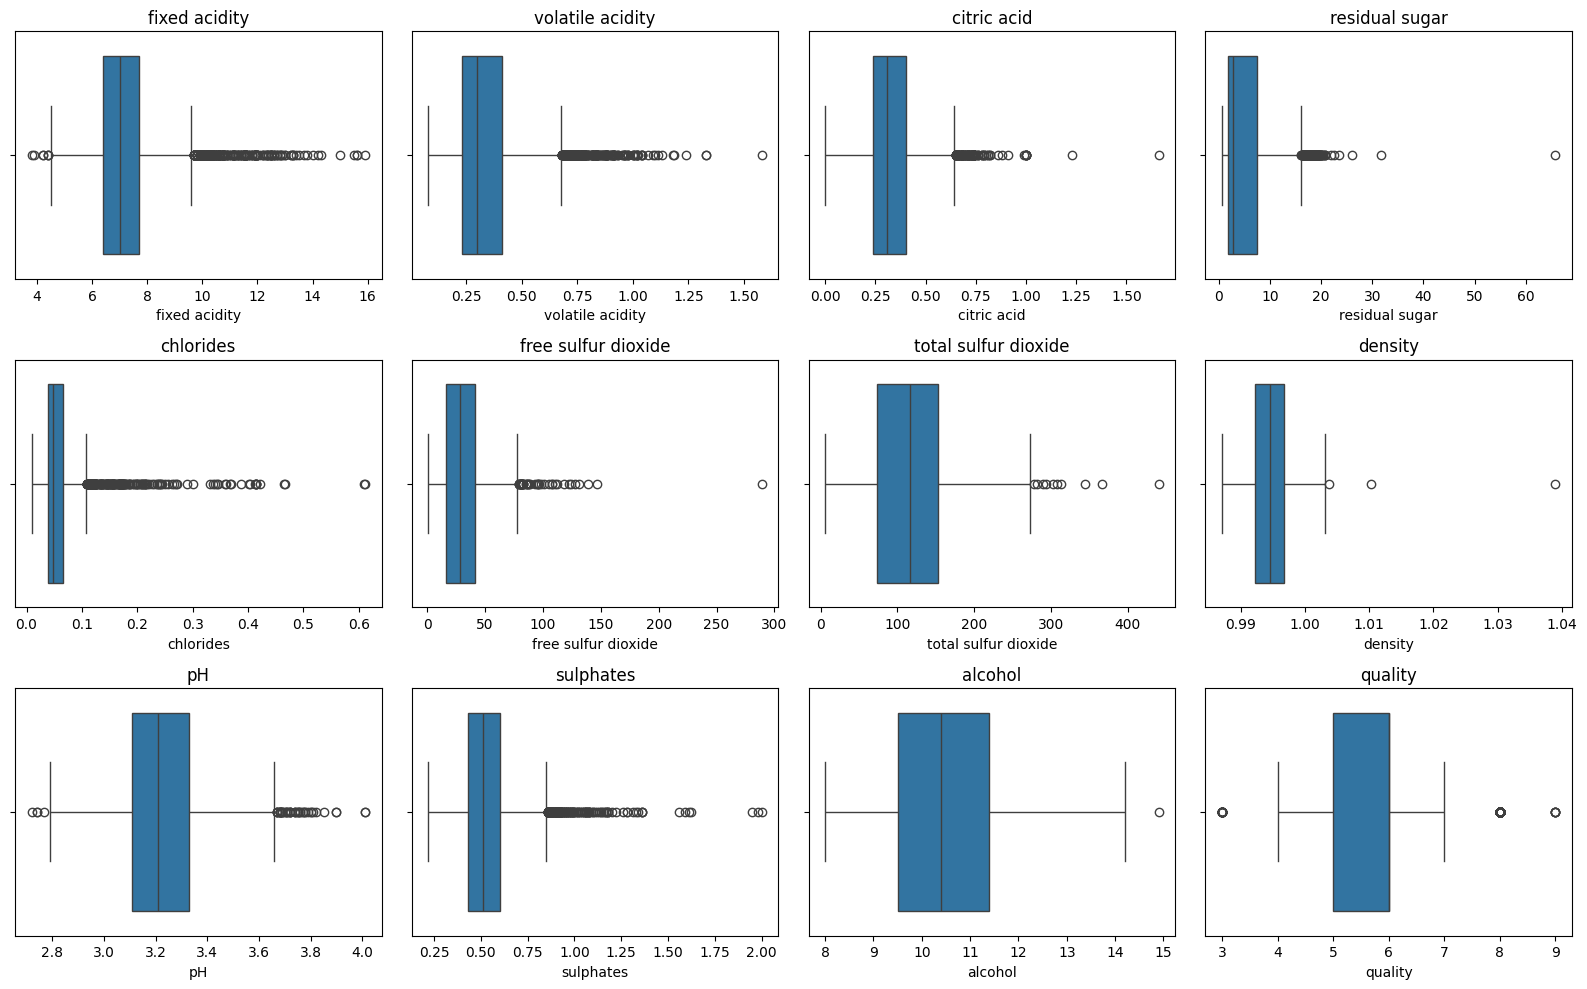

In [101]:
# List of numerical features
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                      'pH', 'sulphates', 'alcohol', 'quality']

# Create box plots for each numerical feature
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


### **Removing Outliers**

In [219]:
# Calculate the first and third quartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df < lower_bound) | (df > upper_bound)

# Remove outliers
df_no_outliers = df[~outliers.any(axis=1)]


## **Define Features** & **Target Variable**


In [239]:
from sklearn.preprocessing import StandardScaler

# Step 1: Analyze the updated correlation matrix
correlation_matrix = df.corr()

# Step 2: Identify features correlated with the target variable (quality)
target_correlation = correlation_matrix['alcohol'].sort_values(ascending=False)

# Step 3: Select the top N most correlated features
N = 10  # Number of top features to select
selected_features = target_correlation[1:N+1].index  # Exclude quality itself

# Step 4: Display selected features
print("Selected Features based on Correlation with Quality:")
print(selected_features)


# Define X (features) and y (target)
X = df[selected_features]
y = df['alcohol']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features
X = scaler.fit_transform(X)




Selected Features based on Correlation with Quality:
Index(['alcohol_content_ratio', 'quality', 'pH', 'pH_difference', 'type',
       'citric acid', 'sulphates', 'sulfur_dioxide_ratio', 'volatile acidity',
       'fixed acidity'],
      dtype='object')


## **Linear Regression**

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

## **Random** Forest

In [241]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)




## **Evaluation Metrics**

In [242]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R^2 Score:", r2_lr)

# Calculate evaluation metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R^2 Score:", r2_rf)


Linear Regression:
Mean Absolute Error: 0.2868696084246858
Mean Squared Error: 0.15765246757328646
Root Mean Squared Error: 0.39705474128045176
R^2 Score: 0.8844100637306073

Random Forest:
Mean Absolute Error: 0.11207139724310784
Mean Squared Error: 0.028581425673558977
Root Mean Squared Error: 0.16906042018627238
R^2 Score: 0.9790442533317197


In [ ]:
# Insights from Linear Regression Model:
# - The mean absolute error (MAE) of approximately 0.287 indicates that, on average,
#   the linear regression model's predictions are off by around 0.287 units of alcohol content.
# - The mean squared error (MSE) of approximately 0.158 suggests that the linear regression
#   model's predictions have a moderate level of variance from the actual alcohol content values.
# - The root mean squared error (RMSE) of approximately 0.397 provides an interpretable
#   measure of the average error in the same units as the target variable.
# - The R-squared (R2) score of approximately 0.884 indicates that approximately 88.4% of the
#   variance in alcohol content is explained by the features included in the model.

# Insights from Random Forest Model:
# - The lower MAE of approximately 0.112 compared to linear regression suggests that the
#   random forest model's predictions are, on average, more accurate than those of the
#   linear regression model.
# - The lower MSE of approximately 0.029 indicates that the random forest model's predictions
#   have less variance from the actual alcohol content values compared to the linear regression model.
# - The lower RMSE of approximately 0.169 confirms that the random forest model's predictions
#   have a smaller average error in predicting alcohol content.
# - The higher R2 score of approximately 0.979 suggests that the random forest model explains
#   approximately 97.9% of the variance in alcohol content, indicating a better fit to the data
#   compared to the linear regression model.
